In [1]:
import pandas as pd
test = pd.read_csv('/Users/junho/Downloads/카카오뉴스기사_최종.csv')

In [2]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3645 entries, 0 to 3644
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      3645 non-null   object
 1   제목      3645 non-null   object
 2   영문번역    3645 non-null   object
dtypes: object(3)
memory usage: 85.6+ KB


In [3]:
test['날짜'] = pd.to_datetime(test['날짜'],format='%Y-%m-%d')

In [4]:
article_dist = []
temp_df = pd.DataFrame(test.groupby('날짜'))
for i in range(len(temp_df)):
    article_dist.append(temp_df[1][i].count()[0])

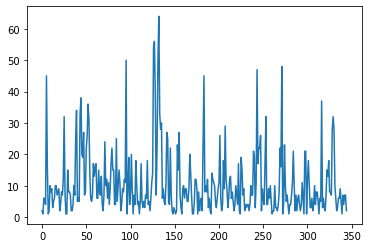

In [5]:
import matplotlib.pyplot as plt
plt.plot(article_dist)

In [62]:
from pykrx import stock
pykrx_df = stock.get_market_ohlcv_by_date(fromdate='2021-04-28', todate='2022-04-28', ticker="035720", adjusted=False)
pykrx = pykrx_df.reset_index()

In [63]:
pykrx

,날짜,시가,고가,저가,종가,거래량,거래대금,등락률
0,2021-04-28,121500,122000,119000,119500,2276272,273142684000,-1.65
1,2021-04-29,120000,120500,115500,117000,3445462,404660726500,-2.09
2,2021-04-30,117000,117000,113000,113500,4405688,502063401000,-2.99
3,2021-05-03,112500,116000,110000,114500,2832622,322440662000,0.88
4,2021-05-04,113500,116000,112000,115500,2228466,254387773960,0.87
...,...,...,...,...,...,...,...,...
243,2022-04-22,92200,92400,91400,92000,1553904,142543689400,-1.71
244,2022-04-25,90400,91600,89600,89700,1511408,136367837200,-2.50
245,2022-04-26,89800,91700,89700,90200,1368258,123958023400,0.56
246,2022-04-27,87600,88900,87600,88400,1390581,122826213900,-2.00


In [64]:
pykrx['label'] = [int(i) for i in list(pykrx['등락률']>0)]

In [65]:
pykrx

,날짜,시가,고가,저가,종가,거래량,거래대금,등락률,label
0,2021-04-28,121500,122000,119000,119500,2276272,273142684000,-1.65,0
1,2021-04-29,120000,120500,115500,117000,3445462,404660726500,-2.09,0
2,2021-04-30,117000,117000,113000,113500,4405688,502063401000,-2.99,0
3,2021-05-03,112500,116000,110000,114500,2832622,322440662000,0.88,1
4,2021-05-04,113500,116000,112000,115500,2228466,254387773960,0.87,1
...,...,...,...,...,...,...,...,...,...
243,2022-04-22,92200,92400,91400,92000,1553904,142543689400,-1.71,0
244,2022-04-25,90400,91600,89600,89700,1511408,136367837200,-2.50,0
245,2022-04-26,89800,91700,89700,90200,1368258,123958023400,0.56,1
246,2022-04-27,87600,88900,87600,88400,1390581,122826213900,-2.00,0


# --

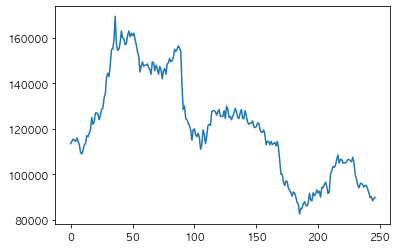

In [107]:
import matplotlib.pyplot as plt
Close = pd.DataFrame(pykrx.loc[:,['날짜','종가']]).reset_index()
Close['날짜'] = pd.to_datetime(Close['날짜'],format='%Y-%m-%d')
Close = Close.drop('index',axis=1)
plt.plot(range(len(Close)),Close['종가']) # rate


In [108]:
Close_date = list(Close['날짜'])
Close_Close = list(Close['종가'])

In [109]:
market_date = set(Close.groupby('날짜').mean().reset_index()['날짜'])

In [110]:
article_date = set(test.groupby('날짜').mean().reset_index()['날짜'])

In [113]:
inter_date = market_date.intersection(article_date) # 기준날짜 \ 누락된 날짜 3 
len(inter_date)

244

In [112]:
plot_price = []
for i in zip(Close_date,Close_Close):
    if i[0] in inter_date:
        plot_price.append(i[1])
len(plot_price)# 

244

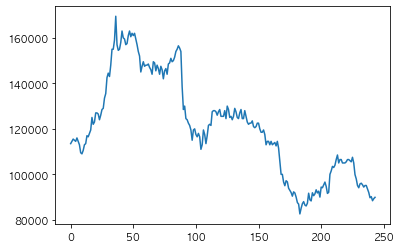

In [114]:
plt.plot(plot_price)

In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3645 entries, 0 to 3644
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      3645 non-null   datetime64[ns]
 1   제목      3645 non-null   object        
 2   영문번역    3645 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 85.6+ KB


In [122]:
inter_date

{Timestamp('2021-04-30 00:00:00'),
 Timestamp('2021-05-03 00:00:00'),
 Timestamp('2021-05-04 00:00:00'),
 Timestamp('2021-05-06 00:00:00'),
 Timestamp('2021-05-07 00:00:00'),
 Timestamp('2021-05-10 00:00:00'),
 Timestamp('2021-05-11 00:00:00'),
 Timestamp('2021-05-12 00:00:00'),
 Timestamp('2021-05-13 00:00:00'),
 Timestamp('2021-05-14 00:00:00'),
 Timestamp('2021-05-17 00:00:00'),
 Timestamp('2021-05-18 00:00:00'),
 Timestamp('2021-05-20 00:00:00'),
 Timestamp('2021-05-21 00:00:00'),
 Timestamp('2021-05-24 00:00:00'),
 Timestamp('2021-05-25 00:00:00'),
 Timestamp('2021-05-26 00:00:00'),
 Timestamp('2021-05-27 00:00:00'),
 Timestamp('2021-05-28 00:00:00'),
 Timestamp('2021-05-31 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-06-02 00:00:00'),
 Timestamp('2021-06-03 00:00:00'),
 Timestamp('2021-06-04 00:00:00'),
 Timestamp('2021-06-07 00:00:00'),
 Timestamp('2021-06-08 00:00:00'),
 Timestamp('2021-06-09 00:00:00'),
 Timestamp('2021-06-10 00:00:00'),
 Timestamp('2021-06-

In [131]:
check = [i for i in zip(test['날짜'],test['영문번역'])]
len(check)

3645

In [129]:
inter_art_mar = []
for i in check:
    if i[0] in inter_date:
        inter_art_mar.append(i)

In [132]:
len(inter_art_mar)

3228

In [ ]:
df[df[''] == '']

In [42]:
pykrx # rate labeling

,날짜,시가,고가,저가,종가,거래량,거래대금,등락률,label
0,2021-04-30,117000,117000,113000,113500,4405688,502063401000,-2.99,0
1,2021-05-03,112500,116000,110000,114500,2832622,322440662000,0.88,1
2,2021-05-04,113500,116000,112000,115500,2228466,254387773960,0.87,1
3,2021-05-06,115000,117500,113500,115000,3234424,371215286000,-0.43,0
4,2021-05-07,115500,117000,114000,114500,2040844,235210298500,-0.43,0
...,...,...,...,...,...,...,...,...,...
242,2022-04-25,90400,91600,89600,89700,1511408,136367837200,-2.50,0
243,2022-04-26,89800,91700,89700,90200,1368258,123958023400,0.56,1
244,2022-04-27,87600,88900,87600,88400,1390581,122826213900,-2.00,0
245,2022-04-28,89700,89800,88100,89300,1216554,108273498400,1.02,1


In [71]:
numeric = pd.read_csv('/Users/junho/Downloads/VIX-나스닥-주가-금리.csv')[76:].drop('Unnamed: 0',axis=1)
#numeric.drop('날짜',axis=1,inplace=True)
#numeric.reset_index().drop('index',axis=1) # 21/4/28 - 22/4/28
numeric['날짜'] = [i.replace('년 ','-').replace('월 ','-').replace('일','') for i in list(numeric['날짜'])]
numeric['날짜'] = pd.to_datetime(numeric['날짜'],format='%Y-%m-%d')
numeric = numeric.reset_index().drop('index',axis=1)
numeric

,날짜,vix종가,나스닥종가,주식종가,변동금리
0,2021-04-28,18.92,"14,051.03",119500,0.24
1,2021-04-29,18.92,"14,082.55",117000,0.24
2,2021-04-30,18.84,"13,962.68",113500,0.24
3,2021-05-03,18.09,"13,895.12",114500,0.24
4,2021-05-04,16.89,"13,633.50",115500,0.24
...,...,...,...,...,...
235,2022-04-22,17.75,"12,839.29",92000,1.19
236,2022-04-25,21.05,"13,004.85",89700,1.19
237,2022-04-26,19.94,"12,490.74",90200,1.19
238,2022-04-27,21.98,"12,488.93",88400,1.19


In [73]:
numeric = pd.merge(numeric,pykrx.loc[:,['날짜','label']],on='날짜').drop('주식종가',axis=1)

In [74]:
numeric

,날짜,vix종가,나스닥종가,변동금리,label
0,2021-04-28,18.92,"14,051.03",0.24,0
1,2021-04-29,18.92,"14,082.55",0.24,0
2,2021-04-30,18.84,"13,962.68",0.24,0
3,2021-05-03,18.09,"13,895.12",0.24,1
4,2021-05-04,16.89,"13,633.50",0.24,1
...,...,...,...,...,...
235,2022-04-22,17.75,"12,839.29",1.19,0
236,2022-04-25,21.05,"13,004.85",1.19,0
237,2022-04-26,19.94,"12,490.74",1.19,1
238,2022-04-27,21.98,"12,488.93",1.19,0


In [103]:
drop_target = ['Unnamed: 0','Unnamed: 0.1','제목','영문번역']
score_tbl = pd.read_csv('/Users/junho/Downloads/카카오뉴스기사_최종.csv').drop(drop_target,axis=1)
score_tbl['날짜'] = pd.to_datetime(score_tbl['날짜'],format='%Y-%m-%d')
score_tbl = pd.DataFrame(score_tbl.groupby('날짜').mean())
score_tbl.reset_index(inplace=True)
score_tbl

,날짜,fear/greed,price_rise/price_drop
0,2021-04-30,-0.107854,0.060508
1,2021-05-01,-0.091137,0.013829
2,2021-05-03,-0.030406,0.004662
3,2021-05-04,0.001512,0.047237
4,2021-05-05,-0.043219,0.016154
...,...,...,...
340,2022-04-25,-0.085346,0.186318
341,2022-04-26,-0.129570,0.264293
342,2022-04-27,-0.180846,0.192471
343,2022-04-28,-0.166341,0.056875


In [107]:
total_tbl = pd.merge(numeric,score_tbl,on='날짜')
total_tbl_train = total_tbl.loc[:,['vix종가','나스닥종가','변동금리','fear/greed','price_rise/price_drop']]
total_tbl_label = total_tbl.label

In [109]:
total_tbl_train

,vix종가,나스닥종가,변동금리,fear/greed,price_rise/price_drop
0,18.84,"13,962.68",0.24,-0.107854,0.060508
1,18.09,"13,895.12",0.24,-0.030406,0.004662
2,16.89,"13,633.50",0.24,0.001512,0.047237
3,17.00,"13,632.84",0.24,0.028963,0.122043
4,16.43,"13,752.24",0.24,-0.021250,0.062353
...,...,...,...,...,...
230,17.75,"12,839.29",1.19,-0.175821,0.050164
231,21.05,"13,004.85",1.19,-0.085346,0.186318
232,19.94,"12,490.74",1.19,-0.129570,0.264293
233,21.98,"12,488.93",1.19,-0.180846,0.192471


In [101]:
total_tbl_label

0      0
1      1
2      1
3      0
4      0
      ..
230    0
231    0
232    1
233    0
234    1
Name: label, Length: 235, dtype: int64

In [110]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression # 앙상블 조합용
from sklearn.neighbors import KNeighborsClassifier # 앙상블 조합용
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KN',knn_clf)],voting='soft')

X_train,X_test,y_train,y_test = train_test_split(
    total_tbl_train,total_tbl_label,test_size=0.2,random_state=10
)

In [117]:
total_tbl

,날짜,vix종가,나스닥종가,변동금리,label,fear/greed,price_rise/price_drop
0,2021-04-30,18.84,"13,962.68",0.24,0,-0.107854,0.060508
1,2021-05-03,18.09,"13,895.12",0.24,1,-0.030406,0.004662
2,2021-05-04,16.89,"13,633.50",0.24,1,0.001512,0.047237
3,2021-05-06,17.00,"13,632.84",0.24,0,0.028963,0.122043
4,2021-05-07,16.43,"13,752.24",0.24,0,-0.021250,0.062353
...,...,...,...,...,...,...,...
230,2022-04-22,17.75,"12,839.29",1.19,0,-0.175821,0.050164
231,2022-04-25,21.05,"13,004.85",1.19,0,-0.085346,0.186318
232,2022-04-26,19.94,"12,490.74",1.19,1,-0.129570,0.264293
233,2022-04-27,21.98,"12,488.93",1.19,0,-0.180846,0.192471
